# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Functions-in-Python" data-toc-modified-id="Functions-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions in Python</a></div><div class="lev2 toc-item"><a href="#User-defined-functions" data-toc-modified-id="User-defined-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>User-defined functions</a></div><div class="lev3 toc-item"><a href="#Function-Definition" data-toc-modified-id="Function-Definition-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Function Definition</a></div><div class="lev3 toc-item"><a href="#Function-Call" data-toc-modified-id="Function-Call-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Function Call</a></div><div class="lev3 toc-item"><a href="#Define-functions-in-other-modules" data-toc-modified-id="Define-functions-in-other-modules-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Define functions in other modules</a></div><div class="lev3 toc-item"><a href="#Keyword-Arguments" data-toc-modified-id="Keyword-Arguments-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Keyword Arguments</a></div><div class="lev3 toc-item"><a href="#Default-Values-for-Function-Arguments" data-toc-modified-id="Default-Values-for-Function-Arguments-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Default Values for Function Arguments</a></div><div class="lev2 toc-item"><a href="#Local-and-Global-Variables-in-Functions" data-toc-modified-id="Local-and-Global-Variables-in-Functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Local and Global Variables in Functions</a></div>

[Back to Lecture Overview](Overview.ipynb)

# Functions in Python
* Author: Johannes Maucher
* Last Update: 06.07.2017

![Anaconda Navigator](../../Pics/DS_Python_Functions_All.PNG)

In general software shall be designed such that it is not only efficient (in terms of computation- and memory complexity) but also readable, reliable and maintainable without too much effort. In order to fulfill these requirements a **modular software design** is preferable. This  design concept implies that the entire code is split into compact, reusable parts. These parts should be designed such that there exists as less as possible dependencies between different parts. Python supports a hierarchical splitting of the software into its parts: On the highest level packages are distinguished. A single package may consist of different modules (Python-files), and each module can contain the definition of multiple classes and functions. Hence, defining code in separate functions is crucial for developing high-quality software. 

Functions are usually defined in external modules. In order to use them in the current program the corresponding modules/packages must be imported.


![Anaconda Navigator](../../Pics/pythonModularity.PNG)


Python already provides many **built-in functions**, such as `len(x)`, which returns the length (number of elements) in `x`, or the function `range(N)`, which returns a list of integers from $0$ to $N-1$. 

Subject of the lecture is the implementation of **user-defined function**.

## User-defined functions
### Function Definition
The general syntax for defining a function in Python is:
```
def function_name(list_of_arguments):
    block of instructions
    return x
```
The definition starts with the key-word `def` followed by the selected function name. After the function-name there must be parenthesis. Within the parenthesis there can be zero, one or many arguments. Arguments are the parameters, which are passed from the calling piece of code to the called function. After the round brackets a colon `:` must be inserted. 

The body of the function contains a sequence of instructions. This block of instructions must be **indented**. A function usually returns one or more values to the calling piece of code. The return value(s) are preceded by the key-word `return`. If `return` is not used in the function the function returns the value `None`.

The function defined in the following code cell calculates the euclidean distance between two points. The function applies the function `pow()`, from the `math`-package of the Python standard library. Therefore this package, or at least the function `pow()` must be imported (first line). The function `pow(x,i)` calculates the $i.th$ power of $x$. 


In [ ]:
import math
def eukliddist(pointA,pointB):
        ''' Function calculates the euclidean distance between a pair of points'''
        mindim=min(len(pointA),len(pointB)) #determine minimum dimension of points
        sum=0
        for i in range(mindim):
                sum+=math.pow(pointA[i]-pointB[i],2)
        return math.sqrt(sum) #return euclidean distance

In the example above the first statement of the function is an optional string literal. This is the function’s documentation string, or docstring (More about docstrings can be found e.g. in [Documentation Strings](https://docs.python.org/2/tutorial/controlflow.html#tut-docstrings)). There are tools which use docstrings to automatically produce online or printed documentation.

### Function Call
Once this function is defined it can be called from elsewhere, as demonstrated below:

In [ ]:
A=[1,1,1]
B=[2,3,3]
d_AB=eukliddist(A,B)
print 'Coordinates of first point:    ',A
print 'Coordinates of second point:   ',B
print '----------------------------------------------'
print 'Distance between the points:     ',d_AB

### Define functions in other modules
As well as function from other packages, also the user-defined functions are often defined in external files of type *.py*. In order to use these functions the corresponding files (=modules) must be imported in the same way as functions from other packages. The directory of the file, which contains the self-defined functions must be included in the *Pythonpath-Variable* of the system. Or it must be in the same directory as the program that imports the module.

We have defined a simple function `cumsum(numList)` in the file *helpers.py*. This function just calculates the sum over all elements in the list, which is passed as argument to the function. The function can be called as follows:


In [ ]:
import helpers
mylist=range(6)
s = helpers.cumsum(mylist)
print s

### Keyword Arguments
In the function-call above the first parameter `A` is passed to the first argument of the function definition (which is `pointA`) and the second parameter `B` is passed to the second argument of the function definition (which is `pointB`). 

Another option for the same function-call is to use key-word arguments within the parenthesis of the function call. That is: Each parameter is explicetly assigned to the name of an argument. In the case of the `eukliddist()`-function from above the function-call will then be: 
```
d_AB=eukliddist(pointA=A,pointB=B)
```
This option yields the same result. The main advantage is, that it does not matter in which sequence the parameters are passed to the function. Moreover, if the arguments of the function are assigned with default-values, than the use of keyword arguments allows, that only for a subset of arguments parameters must be assigned in the function call (see next subsection).


### Default Values for Function Arguments

Default values can be assigned to arguments of functions. Then in the function-call not all arguments must be assigned with parameters. Arguments, for which no parameter is assigned at function-call just have their default-value. For all arguments that have no default-value parameter must be assigned if the function is invoked.

The following code-cell contains three calls of the function `eukliddist2()`, which is a modification of the previously introduced function `eukliddist()`. In `eukliddist2()`, which we defined in module *helpers.py*, default-values are assigned to the arguments `pointA` and `pointB`. These default-values are the origins of the 3-dimensional space, `[0,0,0]`. Hence, it is possible to assign only one or even no argument at function-call. If only one argument is assigned at function-call, the magnitude of the point, which is assigned, is calculated. In the code-cell below, the magnitude of `A=[4,7,9]` is calculated.  

In [5]:
import helpers
A = [4,7,9]
B = [3,5,7]
distAB=helpers.eukliddist2(pointA=A, pointB=B) #Function call with two assignments
print "Euclidean distance between points A and B: ",distAB
magA=helpers.eukliddist2(pointA=A) #Function call with one assignment (one default-value is used)
print "Magnitude of point A:",magA
z=helpers.eukliddist2() #Function call with no assignments (both default-values are used)
print "Useless, but no syntactic error: ",z

Euclidean distance between points A and B:  3.0
Magnitude of point A: 12.0830459736
Useless, but no syntactic error:  0.0


**Example:**


The concept of default-values for function arguments provides much flexibility for applying functions: Sometimes users like to configure parameters in detail, in other cases they do not want to spend any time for configuring specific parameters. For example in visualisation tasks, the flexibility provided by default-values is often exploited: In early iterations graphical features like color, marker-size, marker-type etc. is not relevant and the default-values are applied. Later on, the graphical design becomes more relevant and users like to define these parameters.


The example below implements such a simple visualization task: Two 2-dimensional pointsets shall be plotted, such that they can be distinguished. In the following code-cell we define a function `plot2pointsets()`, which applies the *pyplot*-module from *matplotlib*. In the definition of `plot2pointsets()` the first two arguments are the pointsets. Each pointset is a list of lists. All other arguments in this functions define graphical features as color and markersize. Default values are assigned to these graphical-feature-arguments.

Here is the definition of `plot2pointsets()`:

In [11]:
from matplotlib import pyplot as plt
def plot2pointsets(ps1,ps2,col1='b',mark1='o',col2='r',mark2='s',marksize=10):
        plt.grid(True)
        m1=col1+mark1
        m2=col2+mark2
        xvals=[]
        yvals=[]
        for a in ps1:
                xvals.append(a[0])
                yvals.append(a[1])
        plt.plot(xvals,yvals,m1,markersize=marksize)
        xvals=[]
        yvals=[]
        for a in ps2:
                xvals.append(a[0])
                yvals.append(a[1])
        plt.plot(xvals,yvals,m2,markersize=marksize)
        plt.title("2 Pointsets")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

Next, two 2-dimensional pointsets are defined as lists of lists and the function `plot2pointsets()` is called without explicetly defined graphical arguments. The pointsets are plotted with the default-parameters:

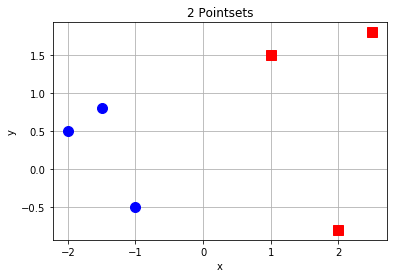

In [12]:
p1=[[-1,-0.5],
    [-1.5, 0.8],
    [-2,0.5],
]
p2=[[1,1.5],
    [2.5, 1.8],
    [2,-0.8],
]
plot2pointsets(p1,p2)

In a second function-call the same pointsets are plotted, but with smaller markers:

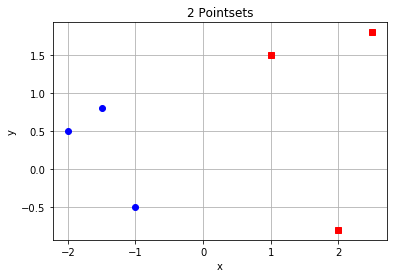

In [15]:
plot2pointsets(p1,p2,marksize=6)

Finally individual markers, colors and markersize is defined for plotting the same pointsets:

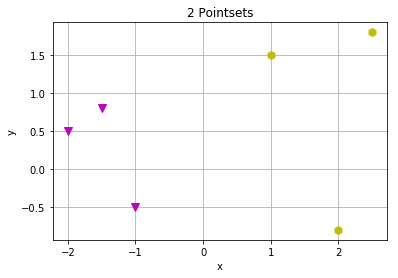

In [17]:
plot2pointsets(p1,p2,col1='m',mark1='v',col2='y',mark2='h',marksize=8)

## Local and Global Variables in Functions
Variables, which are defined inside a function are **local variables**. This means, that they are visible only inside the function and they exist only as long as the function is executed. After the function returns, these local variables can no longer be accessed. 

Variables, which are neither defined in functions, nor in in classes are **global variables**. They are visible in the entire module (in all functions, classes and other statements).

The following code-cell demonstrates, that local variables do not exist outside the function in which they are defined:


In [20]:
def testfunc():
        a="local"
        print "Inside function:  a=",a
        print "Inside function:  b=",b
b="global"
testfunc()
#print "Outside function: a=",a  #Would cause an error, because a is not visible outside function.
print "Outside function: b=",b

 Inside function:  a= local
Inside function:  b= global
Outside function: b= global


The next cell demonstrates, that global variables can not be modified inside a function (at least not in this way). Note that in this function the assignment `b=globalInFunc` allocates a new local variable, which has the same name as a global variable. The local variable `b` is visible in the function, but not outside. It dies as soon as the function returns. However, the global variable `b` exists before and after function-call. 

In [22]:
def testfunc():
        b="globalInFunc"
        a="local"
        print "Inside function:  a=",a
        print "Inside function:  b=",b
b="global"
testfunc()
print "Outside function: b=",b

Inside function:  a= local
Inside function:  b= globalInFunc
Outside function: b= global


If a global variable must be modified inside a function, then inside the function this variable must be defined to be global by the keyword `global`. The effect is demonstrated in the following cell.

In [23]:
def testfunc():
        global b
        b="globalInFunc"
        a="local"
        print "Inside function:  a=",a
        print "Inside function:  b=",b
b="global"
testfunc()
print "Outside function: b=",b

Inside function:  a= local
Inside function:  b= globalInFunc
Outside function: b= globalInFunc


> **Note:** Modification of a global variable inside a function, as in the example above, is quite uncommon and in general a bad practice. Why? 